<a href="https://colab.research.google.com/github/malraharsh/DLF-Index-Replication-Autoencoder/blob/master/Gathering_Index_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/PacktPublishing/Hands-On-Deep-Learning-for-Finance.git

In [2]:
%cd /content/Hands-On-Deep-Learning-for-Finance/Index Replication by Auto-encoders

/content/Hands-On-Deep-Learning-for-Finance/Index Replication by Auto-encoders


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [40]:
!ls data

nasdaq100_6y.pkl  nasdaq100_index_6y.pkl  nasdaq100_stocks.csv


In [58]:
#loading pkl data
stocks_data = pd.read_pickle('data/nasdaq100_6y.pkl')
index_data = pd.read_pickle('data/nasdaq100_index_6y.pkl')
stocks_names = stocks_data.columns.values

In [42]:
stocks_data.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AAL,AMGN,ADI,AAPL,AMAT,ASML,ADSK,ADP,BIDU,BIIB,BMRN,BKNG,AVGO,CDNS,CELG,CERN,CHTR,CHKP,CTAS,CSCO,CTXS,CTSH,CMCSA,COST,CSX,CTRP,DLTR,EBAY,EA,EXPE,FB,FAST,...,MAR,MELI,MCHP,MU,MSFT,MDLZ,MNST,MYL,NTAP,NFLX,NVDA,NXPI,ORLY,PCAR,PAYX,PEP,QCOM,REGN,ROST,SIRI,SWKS,SBUX,SYMC,SNPS,TMUS,TTWO,TSLA,TXN,ULTA,UAL,VRSN,VRSK,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02,10.310681,38.340000,2.53,100.050003,28.400000,361.987000,359.288177,257.309998,13.317790,76.250526,37.301983,69.319641,10.500547,62.326241,36.939999,43.842960,104.120003,150.000000,51.919998,638.400024,28.453209,14.00,40.549999,40.124756,78.099998,49.240002,39.041798,16.701340,53.728039,37.100945,17.213152,87.877045,17.742678,11.580,39.900002,22.383545,14.55,59.622776,28.000000,20.283932,...,35.534439,80.506470,28.502575,6.63,23.584339,23.695293,18.076666,27.700001,30.435581,13.144286,11.810995,27.520674,89.870003,37.212318,26.137842,57.363400,52.772877,181.199997,24.859806,2.955661,20.185839,23.936625,13.826466,32.279999,15.774906,11.48,35.360001,27.187948,101.529999,24.190001,39.849998,52.786572,43.650002,33.046200,52.910000,36.001884,83.655464,99.407043,21.625166,31.863600
2013-01-03,10.367179,37.750000,2.49,98.480003,29.170000,362.197205,359.496826,258.480011,13.012948,75.771561,36.700058,68.444672,10.473944,61.019608,36.369999,44.015667,104.980003,147.860001,52.169998,648.729980,28.601856,13.63,40.834999,40.005058,77.980003,47.180000,39.218452,16.791662,51.915298,36.720875,17.021000,88.777901,17.909809,11.675,39.480000,21.907387,14.74,59.226849,27.770000,20.347540,...,35.818428,80.956558,28.206999,6.90,23.268398,23.668636,17.403334,27.620001,30.320230,13.798572,11.820279,27.382231,90.209999,37.044407,26.178877,57.388214,52.528370,180.710007,26.841654,3.014383,20.036661,24.097651,13.762650,31.900000,15.661067,11.88,34.770000,26.834530,101.989998,24.930000,40.029999,53.394344,45.150002,32.811760,52.299999,35.653797,84.510071,100.476288,21.561975,31.803463
2013-01-04,10.517838,38.130001,2.59,97.620003,29.309999,369.354340,366.600616,259.149994,14.032263,76.105133,36.047298,66.538162,10.473944,60.394299,36.360001,44.406113,104.650002,145.929993,52.540001,648.409973,28.418230,13.43,41.044998,40.433987,77.599998,46.840000,39.599670,16.816288,52.451233,36.633167,17.012066,88.492058,18.420019,11.795,39.619999,22.045223,14.88,60.763378,28.760000,20.372988,...,35.937515,81.005486,28.046535,6.96,22.832916,23.757483,17.296667,28.200001,30.240374,13.711429,12.210264,27.036121,91.650002,37.420204,26.400450,57.470959,51.754105,181.070007,26.462637,3.033956,19.533176,24.236917,13.911550,31.650000,15.823694,12.20,34.400002,26.775625,97.849998,25.850000,40.040001,53.304672,45.849998,32.282124,52.189999,35.537758,84.485657,101.688660,21.640961,31.356745
2013-01-07,10.527254,37.939999,2.67,97.309998,28.940001,367.742737,365.001007,268.459991,14.137052,75.720253,36.157497,66.146751,10.349777,59.414318,36.090000,44.233406,102.290001,146.419998,52.139999,657.380005,28.260838,13.41,42.865002,41.406555,77.400002,47.200001,39.515987,16.660280,53.720150,36.793961,16.936100,87.807762,17.997778,11.850,39.959999,22.350130,14.45,60.716251,29.420000,20.279684,...,35.735977,80.839165,28.012754,7.18,22.790224,23.686405,16.686666,27.910000,29.495008,14.171429,11.857423,26.838343,90.050003,37.012424,26.277353,57.462681,52.169762,182.529999,26.289110,3.014383,19.822216,24.249977,13.932821,31.420000,15.547228,12.16,34.340000,26.859772,96.320000,25.670000,40.060001,53.065544,47.290001,33.020153,52.169998,35.554348,84.241486,102.033867,21.411921,31.227875
2013-01-08,10.348347,38.139999,2.67,97.489998,28.250000,367.017029,364.280701,266.380005,14.441895,75.395241,35.784473,66.324783,10.207882,58.929001,36.299999,44.488701,101.089996,144.389999,51.840000,657.419983,28.068472,13.68,45.705002,40.862915,77.199997,48.220001,39.627563,16.676702,53.956600,36.301826,17.052286,87.643173,18.04175

In [43]:
index_data.head()

Date
2013-01-02    2746.469971
2013-01-03    2732.260010
2013-01-04    2724.489990
2013-01-07    2724.219971
2013-01-08    2718.719971
Name: ^NDX, dtype: float64

In [44]:
stocks_names

array(['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'GOOG', 'AMZN',
       'AAL', 'AMGN', 'ADI', 'AAPL', 'AMAT', 'ASML', 'ADSK', 'ADP',
       'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CELG', 'CERN',
       'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'COST',
       'CSX', 'CTRP', 'DLTR', 'EBAY', 'EA', 'EXPE', 'FB', 'FAST', 'FISV',
       'FOX', 'FOXA', 'GILD', 'HAS', 'HSIC', 'IDXX', 'ILMN', 'INCY',
       'INTC', 'INTU', 'ISRG', 'JBHT', 'KLAC', 'LRCX', 'LBTYA', 'LBTYK',
       'LULU', 'MAR', 'MELI', 'MCHP', 'MU', 'MSFT', 'MDLZ', 'MNST', 'MYL',
       'NTAP', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'PCAR', 'PAYX', 'PEP',
       'QCOM', 'REGN', 'ROST', 'SIRI', 'SWKS', 'SBUX', 'SYMC', 'SNPS',
       'TMUS', 'TTWO', 'TSLA', 'TXN', 'ULTA', 'UAL', 'VRSN', 'VRSK',
       'VRTX', 'WBA', 'WDAY', 'WDC', 'WLTW', 'WYNN', 'XEL', 'XLNX'],
      dtype=object)

In [59]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(stocks_data, index_data[:, np.newaxis], test_size=0.2, shuffle=True)

In [60]:
stocks_scaler = MinMaxScaler([0, 1])
X_train = stocks_scaler.fit_transform(X_train)
X_test = stocks_scaler.transform(X_test)

idx_scaler = MinMaxScaler([0, 1])
y_train = idx_scaler.fit_transform(y_train)
y_test = idx_scaler.transform(y_test)

In [47]:
#creating model
import tensorflow
import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


Using TensorFlow backend.


In [50]:
n_features = X_train.shape[1]

model = Sequential([Dense(8, input_shape=(n_features, ), activation='relu'),
                    Dense(4, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(n_features, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 792       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 98)                882       
Total params: 1,750
Trainable params: 1,750
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='mse', optimizer='Adam')

In [63]:
epochs = 30
batch_size = 1

history = model.fit(X_train,
                    y_train,
                    verbose=1,
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/30
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0012
Epoch 2/30
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0011
Epoch 3/30
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0011
Epoch 4/30
1208/1208 [==============================] - 2s 1ms/step - loss: 9.8311e-04
Epoch 5/30
1208/1208 [==============================] - 1s 1ms/step - loss: 9.9320e-04
Epoch 6/30
1208/1208 [==============================] - 1s 1ms/step - loss: 8.6548e-04
Epoch 7/30
1208/1208 [==============================] - 1s 1ms/step - loss: 8.0750e-04
Epoch 8/30
1208/1208 [==============================] - 1s 1ms/step - loss: 7.4219e-04
Epoch 9/30
1208/1208 [==============================] - 2s 1ms/step - loss: 6.4431e-04
Epoch 10/30
1208/1208 [==============================] - 1s 1ms/step - loss: 6.1289e-04
Epoch 11/30
1208/1208 [==============================] - 1s 1ms/step - loss: 6.1719e-04
Epoch 12/30
1208/1208 [==============================

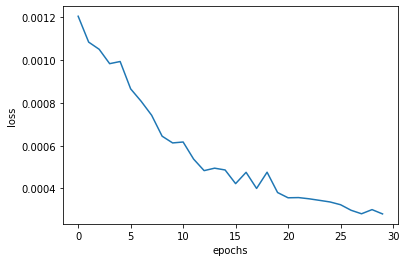

In [65]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [66]:
#saving the model weights
model.save_weights('vanillaAE.h5')
# model.load_weights('vanillaAE.h5')

In [70]:
#evaluating model

test_score = model.evaluate(X_test, y_test)
print('The error is {}'.format(test_score))

10/10 [==============================] - 0s 1ms/step - loss: 3.8569e-04
The error is 0.00038568611489608884


In [98]:
#reconstructing the data
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

train_error = np.mean((X_train_pred - X_train)**2, axis=0)
test_error = np.mean((X_test_pred - X_test)**2, axis=0)

print('Train error is {}'.format(np.mean(train_error)))
print('Test error is {}'.format(np.mean(test_error)))

Train error is 0.03507306758548166
Test error is 0.03421189494439685


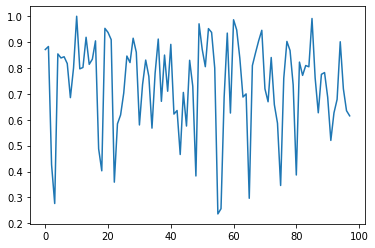

In [77]:
plt.plot(X_train[0, :])
# plt.plot(X_train_pred)
# plt.legend()
plt.show()

In [85]:
sorted_idx = np.argsort(train_error)
sorted_error = train_error[sorted_idx]
stocks_names = stocks_names[sorted_idx]

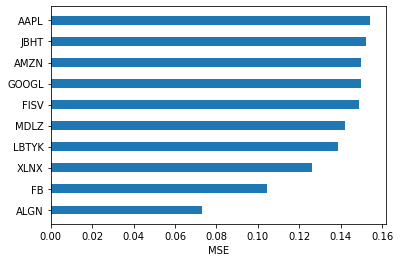

In [89]:
#plotting top k stocks ie with leat error
top_k = 10

plt.barh(2*np.arange(top_k), train_error[sorted_idx[:top_k]], tick_label=stocks_names[sorted_idx[:top_k]])
plt.xlabel('MSE')
plt.show()

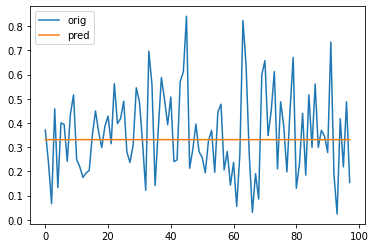

In [103]:
#best reconstruction
best_idx = sorted_idx[-1]
plt.plot(y_[best_idx], label='orig')
plt.plot(X_train_pred[best_idx], label='pred')
plt.legend()
plt.show()

In [ ]:
train_corr = np.corrcoef(X_train, X_train_pred)

In [104]:
# Identify stocks
n = 5

portfolio_train = X_train_pred[:, ind[:n]]
portfolio_test = X_test_pred[:, ind[:n]]

# Create portfolio in-sample
tracked_index_insample = np.mean(portfolio_train, axis=1)

# Create portfolio out-sample
tracked_index_outofsample = np.mean(portfolio_test, axis=1)
# In-sample
plt.figure()
plt.plot(index_train, label='Nasdaq100 Index')
plt.plot(tracked_index_insample, label='Tracked Index')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Normalized price')
plt.show()
#plt.savefig('images/vanillaAE_insample.png', bbox_inches='tight')

NameError: ignored

<Figure size 432x288 with 0 Axes>